<font size="7" color="#0000ff"><center>Big Data Analysis - Final project </center></font>

<font size="5" color="#0000ff"><center>Tat Dat Tran (Leipzig, 19.11.2021)</center></font>

<img src="fig.jpg" width=100%>

# THEORY (30%)

## 4 V´s

<font size="4" color="#0000ff"><b>Task:</b> </font>
**Explain the 4 V's in your own words using an example.**



The <font color="#0000ff">4 V’s</font> are four fundamental features of the big data which stand for <font color="#0000ff">volume</font>, <font color="#0000ff">variety</font>, <font color="#0000ff">velocity</font>, and <font color="#0000ff">veracity</font>. 

An example for a big data is the database collected by the social network Facebook. As we can see, Facebook keeps track of a lot of personal information of users. The majority of this information is used for marketing purposes. Facebook collects information on what you buy, what your friends buy, and so on, then, shows you ads that the company thinks you may like.

<font size="4" color="#0000ff"><b>Volume:</b> </font>
It is about the amount of data. Facebook generates 4 petabytes of data per day and has roughly 2.91 billion monthly active users, which ensure its database size is very huge.   

<font size="4" color="#0000ff"><b>Variety:</b> </font>
Facebook's database is unstructured. It contains texts, pictures, videos, ans so on. 

<font size="4" color="#0000ff"><b>Velocity:</b> </font>
It is about the speed new data is generated and moves around. Think about how many Facebook status updates are being sent every minute of every day to have a good appreciation of its velocity. 

<font size="4" color="#0000ff"><b>Veracity:</b> </font>
The veracity of a big data means the trustworthiness of the data. Is the data accurate and high-quality? When talking about big data that comes from a variety of sources, it’s important to understand the chain of custody, metadata and the context when the data was collected to be able to glean accurate insights. The higher the veracity of the data equates to the data’s importance to analyze and contribute to meaningful results for an organization. Can the Facebook manager rely on the fact that the data is representative? Every good manager knows that there are inherent discrepancies in all the data collected.



## Missing values

a. Use a self-chosen example to explain what missing values are.

Missing data are values that are not recorded in a dataset. They can be a single value missing in a single cell or missing of an entire observation. They could be 
- empty cells '', 
- np.nan in pandas, 
- symbol '?', 
- 'missing value', 'unavailable', or similar 
- unexpected numbers (999999).

For example, in the dataset of the practice part below, 4 columns (features) have missing data.

b. Why does data analysis have to deal with this?

Missing data is a huge problem for data analysis because it distorts findings and we can not visualize properly the data with missing data. 

c. How can missing values be identified in the data analysis?

We could use some following methods to identify missing values:

- .isnull().sum(): return the number of missing values recognized by the system 
https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
- .dtypes(): --> check the feature with type 'object'
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html
- .info() to print a concise summary of our dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html
- .nunique() to see the number of unique values in each feature: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
- .unique() to 
https://pandas.pydata.org/docs/reference/api/pandas.unique.html
- .describe() to generate some descriptive statistics: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
- .min() and .max(): to check if there are unexpected numbers
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html#pandas.DataFrame.max





# PRACTICE (70%)

You work as a data scientist in a start-up. You opened your business a year ago and now you want to take the next step and expand your services. Your business model is to operate a platform where people who have a business idea but do not have the required money can register and collect money for their project within a given time. On the other hand, you have financiers who would like to invest their money in projects and who are looking for investments. As an intermediary, your platform brings together borrowers and lenders. You earn your money with a commission for every project that lands on your platform.
Your database is the history of your platform. All projects are completed projects, i.e. the time to raise money for your project has expired. Your business model stipulates that the money collected will be paid out even if the target amount has not been reached.
There are NO duplicates in the record.
The split data record contains the following columns (including meaning):


- funded_amount ... amount received / paid amount in USD at the end of the crowdfunding period
- loan_amount ... Target amount (amount that you wanted to achieve with funding) in USD
- activity ... Sub-category to which the goal of crowdfunding belongs thematically
- sector ... main category in which the crowdfunding topic falls
- use ... Brief description of what the money should be used for
- country_code ... Country code according to ISO standard
- country ... country name according to ISO standard
- region ... Region
- currency ... Currency in which the funded_amount was then paid out
- term in months ... Duration over which the loan is to be paid out
- lender_count ... Lender (i.e. how many people gave money for the project)
- borrower_genders ... gender and number of borrowers, i.e. those who initiated the crowdfunding project
- repayment interval ... repayment modalities / frequency

## Import libraries and data

### Import libraries

We first import all libraries we need for our analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

### Collect data

We import the first data .csv due to the library pandas: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
and use .head() https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html to see the first 5 rows

In [2]:
df1 = pd.read_csv('part1.csv')
df1.head()

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet
3,3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,11.0,8,female,irregular
4,4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,14.0,16,female,monthly


We check the shape of this first data https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html

In [3]:
df1.shape

(335000, 14)

Now we import the second data and see the first 5 rows

In [4]:
df2 = pd.read_csv('part2.csv', sep='#')
df2.head()

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,0,175.0,175.0,Liquor Store / Off-License,Food,to purchase additional stock of coconut wine t...,PH,Philippines,"Palo, Leyte",PHP,8.0,6,female,irregular
1,1,325.0,325.0,Livestock,Agriculture,to buy 3 zebus and food to fatten them up.,MG,Madagascar,Antsirabe,MGA,12.0,13,female,monthly
2,2,550.0,550.0,Food Stall,Food,to buy ingredients for her food-vending busine...,PH,Philippines,"Cordova, Cebu",PHP,5.0,6,female,irregular
3,3,1300.0,1300.0,Cattle,Agriculture,to buy one head of cattle.,EG,Egypt,Baniswef,EGP,14.0,50,male,monthly
4,4,900.0,900.0,Consumer Goods,Personal Use,to buy consumer goods amongst others.,PE,Peru,Urubamba - Urubamba - Cusco,PEN,6.0,1,female,irregular


Then we check the shape of this second data

In [5]:
df2.shape

(336205, 14)

We see that two datas share the same features, therefore we could combine two data into a bigger data by using concat in library pandas: https://pandas.pydata.org/docs/reference/api/pandas.concat.html
and see the first 5 rows to check

In [6]:
df = pd.concat([df1,df2], axis=0)
df.head()

,Unnamed: 0,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet
3,3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,11.0,8,female,irregular
4,4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,14.0,16,female,monthly


Then we check the shape of our new data which looks fine

In [7]:
df.shape

(671205, 14)

## Data Preprocessing 

### First look at the data

We first take a look at our data by using 

- .nunique() to see the number of unique values in each feature: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
- .isnull().sum() to see how many null values in each feature:
https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html
- .describe() to generate some descriptive statistics: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
- .info() to print a concise summary of our dataframe: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [8]:
df.nunique()

Unnamed: 0            336205
funded_amount            610
loan_amount              479
activity                 163
sector                    15
use                   424912
country_code              86
country                   87
region                 12695
currency                  67
term_in_months           148
lender_count             503
borrower_genders       11298
repayment_interval         4
dtype: int64

In [9]:
df.isnull().sum()

Unnamed: 0                0
funded_amount             0
loan_amount               0
activity                  0
sector                    0
use                    4232
country_code              8
country                   0
region                56800
currency                  0
term_in_months            0
lender_count              0
borrower_genders       4221
repayment_interval        0
dtype: int64

In [10]:
df.describe()

,Unnamed: 0,funded_amount,loan_amount,term_in_months,lender_count
count,671205.000000,671205.000000,671205.000000,671205.000000,671205.000000
mean,167801.290828,785.995061,842.397107,13.739022,20.590922
std,96881.105762,1130.398941,1198.660073,8.598919,28.459551
min,0.000000,0.000000,25.000000,1.000000,0.000000
25%,83900.000000,250.000000,275.000000,8.000000,7.000000
50%,167801.000000,450.000000,500.000000,13.000000,13.000000
75%,251701.000000,900.000000,1000.000000,14.000000,24.000000
max,336204.000000,100000.000000,100000.000000,158.000000,2986.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671205 entries, 0 to 336204
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Unnamed: 0          671205 non-null  int64  
 1   funded_amount       671205 non-null  float64
 2   loan_amount         671205 non-null  float64
 3   activity            671205 non-null  object 
 4   sector              671205 non-null  object 
 5   use                 666973 non-null  object 
 6   country_code        671197 non-null  object 
 7   country             671205 non-null  object 
 8   region              614405 non-null  object 
 9   currency            671205 non-null  object 
 10  term_in_months      671205 non-null  float64
 11  lender_count        671205 non-null  int64  
 12  borrower_genders    666984 non-null  object 
 13  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 76.8+ MB


<font size="3" color="#ff00ff">Comments: 
- There are missing data at columns: 'use', 'country_code', 'region', 'borrower_genders'.
- Some data types could be changed to save memory such as: 
    - 'funded_amount', 'loan_amount', 'term_in_months', 'lender_count' could be int32
    - 'activity', 'sector', 'use', 'country_code', 'country', 'region', 'currency', 'borrower_genders', 'repayment_interval'  could be string.
- The column 'Unnamed: 0' is not important and could be dropped.


#### Drop unnecessary data

We drop the unnecessery feature 'Unnamed: 0' by using .drop: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
and see the first 5 rows as well as the shape of our new data.

In [12]:
df.drop(['Unnamed: 0'],axis= 1,inplace=True)

In [13]:
df.head(5)

,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,term_in_months,lender_count,borrower_genders,repayment_interval
0,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,12.0,12,female,irregular
1,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,11.0,14,"female, female",irregular
2,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,43.0,6,female,bullet
3,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,11.0,8,female,irregular
4,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,14.0,16,female,monthly


In [14]:
df.shape

(671205, 13)

#### Optimal in memory

We change some features from 'float64' or 'int64' into 'int32' by using .astype to save memory: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html

The memory size is reduced from 71.7MB into 61.5MB after this process.

In [15]:
df.memory_usage(deep=True)

Index                  5369640
funded_amount          5369640
loan_amount            5369640
activity              46521289
sector                43603755
use                   79433763
country_code          39600879
country               43923974
region                46603210
currency              40272300
term_in_months         5369640
lender_count           5369640
borrower_genders      47039080
repayment_interval    43400106
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671205 entries, 0 to 336204
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   funded_amount       671205 non-null  float64
 1   loan_amount         671205 non-null  float64
 2   activity            671205 non-null  object 
 3   sector              671205 non-null  object 
 4   use                 666973 non-null  object 
 5   country_code        671197 non-null  object 
 6   country             671205 non-null  object 
 7   region              614405 non-null  object 
 8   currency            671205 non-null  object 
 9   term_in_months      671205 non-null  float64
 10  lender_count        671205 non-null  int64  
 11  borrower_genders    666984 non-null  object 
 12  repayment_interval  671205 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 71.7+ MB


In [17]:
df.funded_amount = df.funded_amount.astype('int32')
df.loan_amount = df.loan_amount.astype('int32')
df.term_in_months = df.term_in_months.astype('int32')
df.lender_count = df.lender_count.astype('int32')
# df.activity = df.activity.astype('str')
# df.sector = df.sector.astype('str')
# df.use  = df.use.astype('str')
# df.country_code = df.country_code.astype('str')
# df.country = df.country.astype('str')
# df.region = df.region.astype('str')
# df.currency = df.currency.astype('str')
# df.borrower_genders = df.borrower_genders.astype('str')
# df.repayment_interval = df.repayment_interval.astype('str')

df.memory_usage(deep=True)

Index                  5369640
funded_amount          2684820
loan_amount            2684820
activity              46521289
sector                43603755
use                   79433763
country_code          39600879
country               43923974
region                46603210
currency              40272300
term_in_months         2684820
lender_count           2684820
borrower_genders      47039080
repayment_interval    43400106
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 671205 entries, 0 to 336204
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   funded_amount       671205 non-null  int32 
 1   loan_amount         671205 non-null  int32 
 2   activity            671205 non-null  object
 3   sector              671205 non-null  object
 4   use                 666973 non-null  object
 5   country_code        671197 non-null  object
 6   country             671205 non-null  object
 7   region              614405 non-null  object
 8   currency            671205 non-null  object
 9   term_in_months      671205 non-null  int32 
 10  lender_count        671205 non-null  int32 
 11  borrower_genders    666984 non-null  object
 12  repayment_interval  671205 non-null  object
dtypes: int32(4), object(9)
memory usage: 61.5+ MB


### Finding and working with the missing/null values

Now we consider more details features where there are missing data.

#### Column 'use'

In [19]:
df['use'].isnull().sum() 

4232

<font size="3" color="#ff00ff">
Comment: 
    
- There are 4232 missing data in 'use' but the information is not so important, we could ignore the missing data here.


#### Column 'country_code'

In [20]:
df['country_code'].isnull().sum() 

8

In [21]:
df[df['country_code'].isna()].country.unique() # Check the unique values in 'country' where 'country_code' is np.nan

array(['Namibia'], dtype=object)

In [22]:
# df.country_code.fillna('NA', inplace=True)
df.loc[df['country_code'].isna(),'country_code'] = 'NA' # Assign the missing values in 'country_code' by 'NA'

<font size="3" color="#ff00ff">
Comment: 
    
- There are 8 missing data in 'country_code', all in country Namibia, we could fill in the missing data for 'country_code' as 'NA'.



#### Column 'region'

In [23]:
df['region'].isnull().sum() 

56800

In [24]:
df[df['region'].isna()].country.unique()

array(['Kenya', 'El Salvador', 'Senegal', 'Iraq', 'United States', 'Peru',
       'Tanzania', 'Guatemala', 'Colombia', 'Indonesia', 'Kosovo',
       'Timor-Leste', 'Turkey', 'Philippines', 'Palestine', 'Burundi',
       'Tajikistan', 'Honduras', 'Jordan', 'Mexico', 'Lebanon', 'Albania',
       'Nicaragua', 'Bolivia', 'Israel', 'Rwanda', 'Azerbaijan',
       'Ecuador', 'Mongolia', 'Haiti', 'Cambodia', 'Sierra Leone',
       'Yemen', 'Zimbabwe', 'Paraguay', 'Uganda', 'Armenia',
       'Dominican Republic', 'Benin', 'Belize', 'Ghana', 'Mozambique',
       'Zambia', 'Samoa', 'Brazil', 'Panama', 'Pakistan', 'Burkina Faso',
       'Suriname', 'Virgin Islands', 'Togo', 'South Africa', 'Malawi',
       'Nigeria', 'Liberia', 'Vietnam', 'Costa Rica', 'Guam',
       'Myanmar (Burma)', 'Mali', 'Madagascar',
       'The Democratic Republic of the Congo', 'Cameroon', 'Georgia',
       'Puerto Rico', 'South Sudan', 'Moldova', 'Chile', 'Kyrgyzstan',
       'India', 'China', 'Bhutan'], dtype=object)

In [25]:
df[df['region'].isna()].repayment_interval.unique()

array(['irregular', 'monthly', 'bullet', 'weekly'], dtype=object)

#### Column 'borrower_genders'

In [26]:
df['borrower_genders'].isnull().sum() 

4221

In [27]:
df[df['borrower_genders'].isna()].repayment_interval.unique()

array(['monthly', 'bullet', 'irregular'], dtype=object)

<font size="3" color="#ff00ff">
Comment: 
    
- The missing values of feature 'region' and 'borrower_genders' could not be assigned reasonly if we do not have more external information. By gooling, we could find, for example, the database 'kiva.loans.csv' in https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding/version/5?select=kiva_loans.csv
which consists of 20 features instead of our 13 features. With the feature 'tags' we could somehow assign missing values for 'region' and 'borrowe_genders' but this is out of this project.





## Exploratory Data Analysis

In [28]:
df.describe()

,funded_amount,loan_amount,term_in_months,lender_count
count,671205.000000,671205.000000,671205.000000,671205.000000
mean,785.995061,842.397107,13.739022,20.590922
std,1130.398941,1198.660073,8.598919,28.459551
min,0.000000,25.000000,1.000000,0.000000
25%,250.000000,275.000000,8.000000,7.000000
50%,450.000000,500.000000,13.000000,13.000000
75%,900.000000,1000.000000,14.000000,24.000000
max,100000.000000,100000.000000,158.000000,2986.000000


Comments: 

- The mean number of lenders is 20
- The mean number of months is 13, while minimum is 1 and maximum is 158

### Activities for loan

Text(0.5, 1.0, '10 most frequent activities for loan')

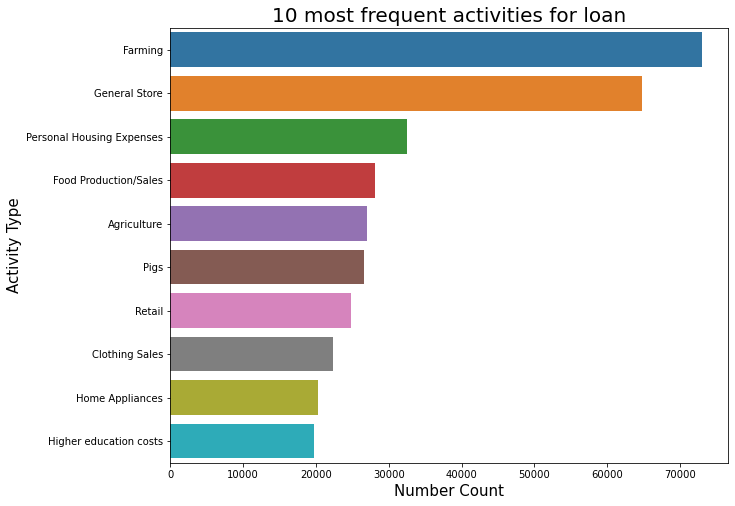

In [29]:
# group_activity = df.groupby('activity',as_index=False).agg(size=('activity','size'))
# group_activity.sort_values(by= 'size', ascending=False, inplace=True)
# group_activity
# plt.figure(figsize = (10,8))
# sns.barplot(x=group_activity['size'].head(10), y=group_activity['activity'].head(10))
# plt.xlabel('Number Count', fontsize = 15)
# plt.ylabel('Activity Type', fontsize = 15)
# plt.title('10 most frequent activities for loan', fontsize = 20)

activities = df.activity.value_counts().head(10)
plt.figure(figsize = (10,8))
sns.barplot(x=activities.values, y=activities.index)
plt.xlabel('Number Count', fontsize = 15)
plt.ylabel('Activity Type', fontsize = 15)
plt.title('10 most frequent activities for loan', fontsize = 20)

<font size="3" color="#ff00ff">
Comment: 
    
- We see that Farming is the dominant activity of all followed by General Store, Personal Housing Expenses, etc.


### Sectors for loan

Text(0.5, 1.0, '10 most frequent sectors for loan')

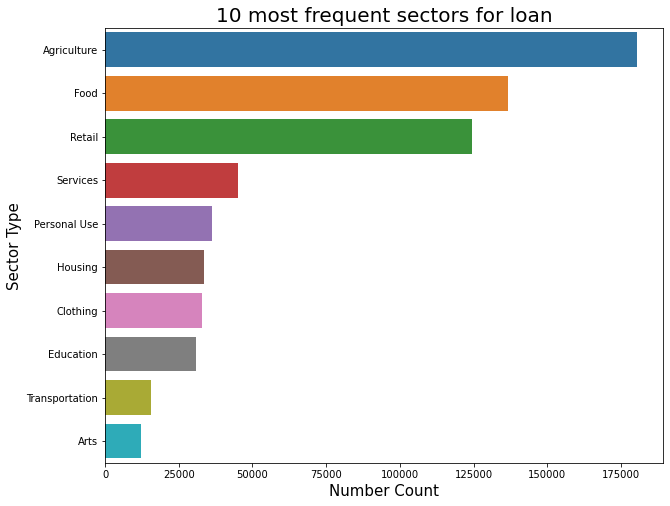

In [30]:
# group_sector = df.groupby('sector',as_index=False).agg(size=('sector','size'))
# group_sector.sort_values(by= 'size', ascending=False, inplace=True)
# group_sector
# plt.figure(figsize = (13,8))
# sns.barplot(x=group_sector['size'], y=group_sector['sector'])
# plt.xlabel('Number Count', fontsize = 15)
# plt.ylabel('Sector Type', fontsize = 15)
# plt.title('Most frequent sectors for loan', fontsize = 20)

sectors = df.sector.value_counts().head(10)
plt.figure(figsize = (10,8))
sns.barplot(x=sectors.values, y=sectors.index)
plt.xlabel('Number Count', fontsize = 15)
plt.ylabel('Sector Type', fontsize = 15)
plt.title('10 most frequent sectors for loan', fontsize = 20)

<font size="3" color="#ff00ff">
Comment: 
    
- We see that Agriculture is the dominant sector of all followed by Food, Retail, Services etc.


### Countries for loan

Text(0.5, 1.0, '10 most frequent countries for loan')

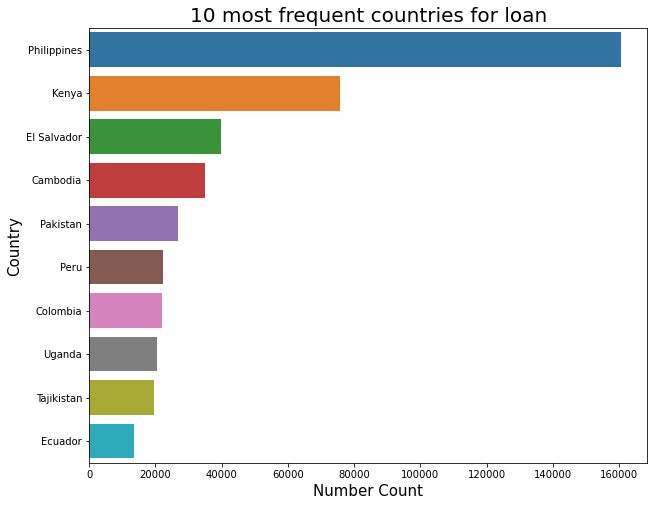

In [31]:
countries = df.country.value_counts().head(10)
plt.figure(figsize = (10,8))
sns.barplot(x=countries.values, y=countries.index)
plt.xlabel('Number Count', fontsize = 15)
plt.ylabel('Country', fontsize = 15)
plt.title('10 most frequent countries for loan', fontsize = 20)

<font size="3" color="#ff00ff">
Comment: 
    
- Hence we can see that Philippines has been the main focus of the loans followed by Kenya, El Salvador, etc.




### Gender vs loan

We seperate each line of column 'borrower_genders' by the numbers of males and females in that line. And add two columns for our dataset, name 'female_list' and 'male_list'. Then we use pie plot to compare the males and females who borrow money.

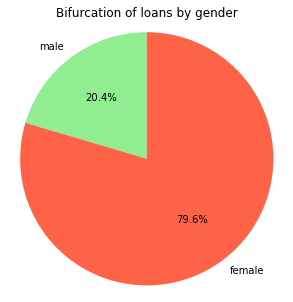

In [32]:
female_list = []
male_list = []

for irow in df.borrower_genders:

    number_female_list = 0
    number_male_list = 0

    for j in str(irow).split(sep=', '):

        if j=='female':
            number_female_list += 1
        elif j=='male':
            number_male_list += 1

    female_list.append(number_female_list)
    male_list.append(number_male_list)

df['female_list'] = female_list
df['male_list'] = male_list

    
data = [sum(male_list), sum(female_list)]
labels = ['male','female']
colors = ['lightgreen','tomato']

fig1, ax1 = plt.subplots(figsize = (5,5))

ax1.pie(data, labels = labels, colors = colors, autopct='%.1f%%',startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("Bifurcation of loans by gender")
plt.show()




<font size="3" color="#ff00ff">
Comment: 
    
- From the above pie chart it is evident that females are active to loans as four times as males.



### Continent vs loan

We now import a new document, say 'countryContinent.csv', which assigns continents for our countries, rename it https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html and merge it https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html into our dataset, and name the new dataset as 'kiva_df'.

In [33]:
country_df = pd.read_csv('countryContinent.csv', encoding='ISO-8859-1')

In [34]:
country_df = country_df.rename(columns={'country_code': 'codes', 'code_2': 'country_code'})

In [35]:
kiva_df = pd.merge(df, country_df[['country_code' , 'continent' , 'sub_region']], on = 'country_code' ,how = 'left')

In [36]:
kiva_df.shape

(671205, 17)

Text(0.5, 1.0, 'Most frequent Continent for loan')

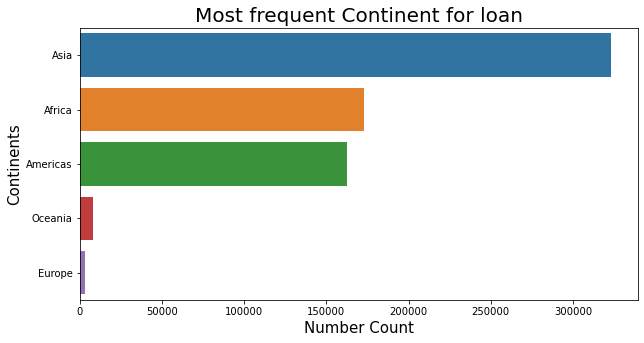

In [37]:
continents = kiva_df.continent.value_counts()
plt.figure(figsize = (10,5))
sns.barplot(x=continents.values, y=continents.index)
plt.xlabel('Number Count', fontsize = 15)
plt.ylabel('Continents', fontsize = 15)
plt.title('Most frequent Continent for loan', fontsize = 20)

<font size="3" color="#ff00ff">
Comment: 
    
- The Asian has most active in loan, follows are Afria, Americas, Oceania and the last is Europe.




### Repayment interval vs loan

In [38]:
kiva_df.repayment_interval.value_counts(), kiva_df.shape

(monthly      342717
 irregular    257158
 bullet        70728
 weekly          602
 Name: repayment_interval, dtype: int64,
 (671205, 17))

Text(0.5, 1.0, 'Bifurcation of loans by repayment interval')

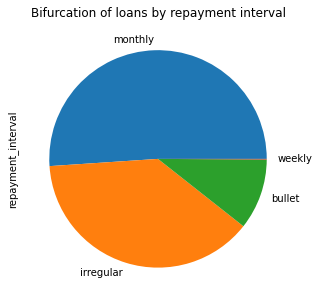

In [39]:
kiva_df.repayment_interval.value_counts().plot(kind = 'pie', figsize = (5,5))
plt.title('Bifurcation of loans by repayment interval')

<font size="3" color="#ff00ff">
Comment: 
    
- As we can see that most of the loans have repayment interval of monthly, where as it is important to notice that around 38% of loans are irregular in nature. On the other hand as we can see weekly intervals are just negligible.





### Subregions vs loan

Text(0.5, 1.0, 'Most frequent Sub regions for loan')

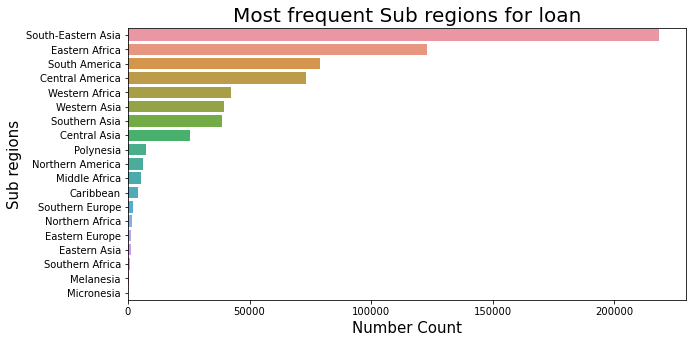

In [40]:
sub_regions = kiva_df.sub_region.value_counts()
plt.figure(figsize = (10,5))
sns.barplot(x=sub_regions.values, y=sub_regions.index)
plt.xlabel('Number Count', fontsize = 15)
plt.ylabel('Sub regions', fontsize = 15)
plt.title('Most frequent Sub regions for loan', fontsize = 20)

<font size="3" color="#ff00ff">
Comment: 
    
- South East Asia is the dominant sub region. Followed by Eastern Africa,South America, Central America and Western Africa.



### Lenders

We now take a look at the distribution of lenders

In [41]:
top_lender_count = kiva_df.lender_count.value_counts(ascending=False).head(30)

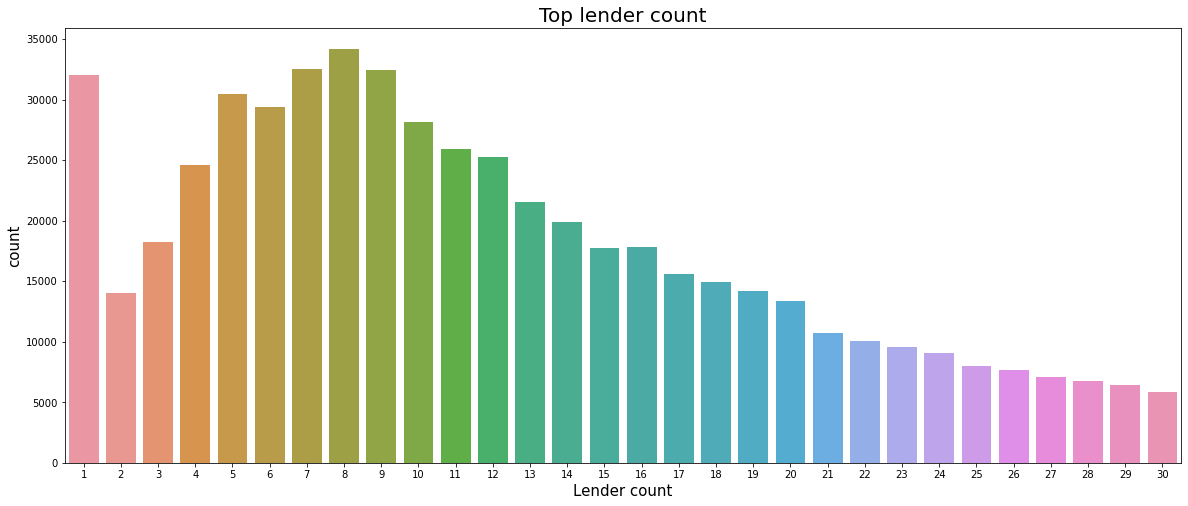

In [42]:
plt.figure(figsize= (20,8))
fig = sns.barplot(x=top_lender_count.index, y=top_lender_count.values)
fig.set_title('Top lender count', fontsize = 20)
fig.set_xlabel('Lender count', fontsize=15)
fig.set_ylabel('count', fontsize = 15)
plt.show()

<font size="3" color="#ff00ff">
Comment: 
    
- As we can see there is an increasing trend till highest at 8 lenders and decreasing after that. There lies another peak at solo lenders as well.



## Summary

- Farming is the dominant activity of all for loan, followed by General Store, Personal Housing Expenses, etc.
- We see that Agriculture is the dominant sector of all followed by Food, Retail, Services etc.
- Philippines has been the main focus of the loans followed by Kenya, El Salvador, etc.
- Females are active to loans as four times as males
- The Asian has most active in loan, follows are Afria, Americas, Oceania and the last is Europe.
- Most of the loans have repayment interval of monthly, where as it is important to notice that around 38% of loans are irregular in nature. On the other hand as we can see weekly intervals are just negligible.
- South East Asia is the dominant sub region for loan. Followed by Eastern Africa,South America, Central America and Western Africa.
- There is an increasing trend till highest at 8 lenders and decreasing after that. There lies another peak at solo lenders as well.

   



